<a href="https://colab.research.google.com/github/dheerajkumar1a1a/Kaggle_github/blob/main/arrclean_adf_tomato_Ranchi_prophet_multiv_rain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

In [ ]:
zip_ref = zipfile.ZipFile("multi.zip", 'r')
zip_ref.extractall("/content/")
zip_ref.close()

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cufflinks as cf
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default='plotly_white'
import os
import plotly.io as pio
pio.renderers.default = 'colab'
import seaborn as sns
import plotly.express as px
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
parent_df={}
parent_df['RANCHI']=pd.read_csv('complete_data.csv',index_col=0,parse_dates=[0])

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
# sns.lineplot(data=parent_df['RANCHI'])
parent_df['RANCHI'].iplot()

In [ ]:
px.line(parent_df['RANCHI'],x=parent_df['RANCHI'].index,y=['Retail Prices','Arrival Quantity'])

In [ ]:
px.line(parent_df['RANCHI'],x=parent_df['RANCHI'].index,y=['Arrival Quantity'])

In [ ]:
parent_df['RANCHI'].drop(['2010-02-18','2012-06-27','2014-05-30'],inplace=True)

In [ ]:
parent_df['RANCHI'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7468 entries, 2002-01-01 to 2023-06-30
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Arrival Quantity  4954 non-null   float64
 1   Retail Prices     4954 non-null   float64
 2   Min Price         4954 non-null   float64
 3   Max Price         4954 non-null   float64
 4   Modal Price       4954 non-null   float64
dtypes: float64(5)
memory usage: 350.1 KB


In [ ]:
px.line(parent_df['RANCHI'],x=parent_df['RANCHI'].index,y=['Arrival Quantity'])

In [ ]:
parent_df['RANCHI'].loc['2010':'2019','Arrival Quantity'].isnull().sum()

854

In [ ]:
parent_df['RANCHI']['Arrival Quantity'].fillna(-1,inplace=True)

In [ ]:
parent_df['RANCHI'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7468 entries, 2002-01-01 to 2023-06-30
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Arrival Quantity  7468 non-null   float64
 1   Retail Prices     4954 non-null   float64
 2   Min Price         4954 non-null   float64
 3   Max Price         4954 non-null   float64
 4   Modal Price       4954 non-null   float64
dtypes: float64(5)
memory usage: 608.1 KB


In [ ]:
parent_df['RANCHI']=parent_df['RANCHI'][parent_df['RANCHI']['Arrival Quantity']<=300]

In [ ]:
parent_df['RANCHI'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7466 entries, 2002-01-01 to 2023-06-30
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Arrival Quantity  7466 non-null   float64
 1   Retail Prices     4952 non-null   float64
 2   Min Price         4952 non-null   float64
 3   Max Price         4952 non-null   float64
 4   Modal Price       4952 non-null   float64
dtypes: float64(5)
memory usage: 350.0 KB


In [ ]:
px.line(parent_df['RANCHI'],x=parent_df['RANCHI'].index,y=['Arrival Quantity'])

In [ ]:
parent_df['RANCHI']['Arrival Quantity'].replace(-1,np.nan,inplace=True)

In [ ]:
parent_df['RANCHI'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7466 entries, 2002-01-01 to 2023-06-30
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Arrival Quantity  4952 non-null   float64
 1   Retail Prices     4952 non-null   float64
 2   Min Price         4952 non-null   float64
 3   Max Price         4952 non-null   float64
 4   Modal Price       4952 non-null   float64
dtypes: float64(5)
memory usage: 350.0 KB


In [ ]:
df_Ranchi=parent_df['RANCHI'].copy()

In [ ]:
df_Ranchi['2011':'2012'].describe()

Arrival Quantity  Retail Prices    Min Price     Max Price  Modal Price
count        580.000000     580.000000   580.000000    580.000000   580.000000
mean          21.462069    1725.517241   772.468966   1044.360345   886.324138
std            8.741160     990.688378   358.291856    673.969941   401.884265
min            1.000000     500.000000   150.000000    245.000000   200.000000
25%           16.000000    1000.000000   400.000000    600.000000   500.000000
50%           22.000000    1600.000000   790.000000   1000.000000   900.000000
75%           28.000000    2400.000000  1100.000000   1400.000000  1200.000000
max           60.000000   18000.000000  2100.000000  13004.000000  2250.000000

In [ ]:
df_Ranchi['2011':'2014']['Retail Prices'].iplot()

In [ ]:
df_Ranchi_1=df_Ranchi.copy()
df_Ranchi.isnull().sum()

Arrival Quantity    2514
Retail Prices       2514
Min Price           2514
Max Price           2514
Modal Price         2514
dtype: int64

In [ ]:
# https://www.ceicdata.com/en/india/retail-price-department-of-agriculture-and-cooperation-food-by-cities-tomato/retail-price-doac-tomato-jharkhand-ranchi
# above is the source provided to prove that 18k price is an outlier

df_Ranchi_1=df_Ranchi_1[df_Ranchi_1['Retail Prices']<10000]
df_Ranchi_1.isnull().sum()
# df_Ranchi['Retail Prices'].iplot()

Arrival Quantity    0
Retail Prices       0
Min Price           0
Max Price           0
Modal Price         0
dtype: int64

In [ ]:
df_Ranchi=df_Ranchi['2010':'2020'].copy()


In [ ]:
df_Ranchi_1=df_Ranchi_1['2010':'2020'].copy()
df_Ranchi_1.isnull().sum()

Arrival Quantity    0
Retail Prices       0
Min Price           0
Max Price           0
Modal Price         0
dtype: int64

In [ ]:
df_Ranchi_dropped=df_Ranchi_1.dropna()

In [ ]:
df_Ranchi_dropped['Arrival Quantity']['2020'].iplot()

In [ ]:
df_Ranchi_dropped.iplot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

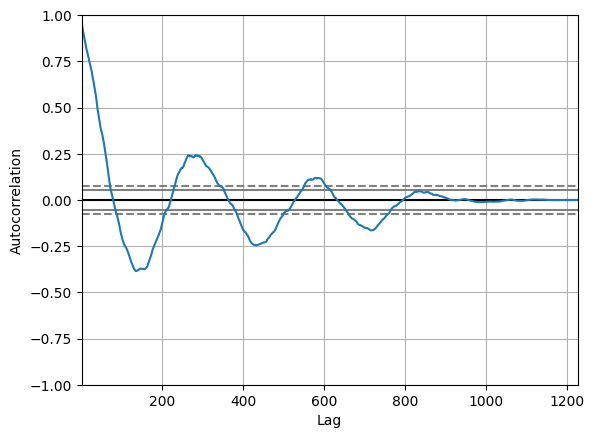

In [ ]:
pd.plotting.autocorrelation_plot(df_Ranchi_dropped['2016':'2020']['Arrival Quantity'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

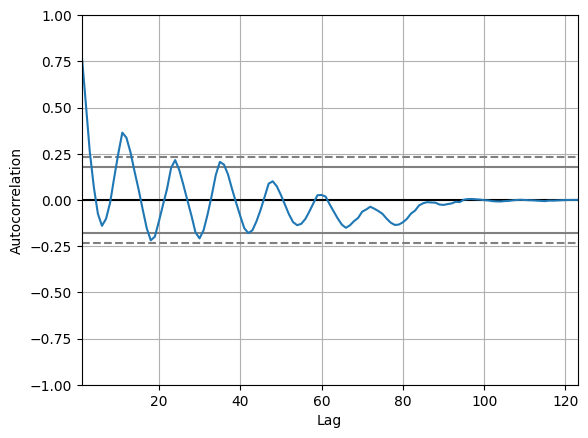

In [ ]:
pd.plotting.autocorrelation_plot(df_Ranchi_dropped['2010':'2020']['Arrival Quantity'].resample('1m').max())

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

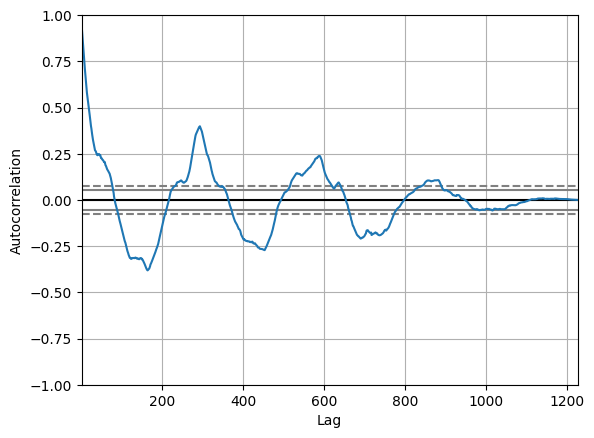

In [ ]:
pd.plotting.autocorrelation_plot(df_Ranchi_dropped['2016':'2020']['Retail Prices'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

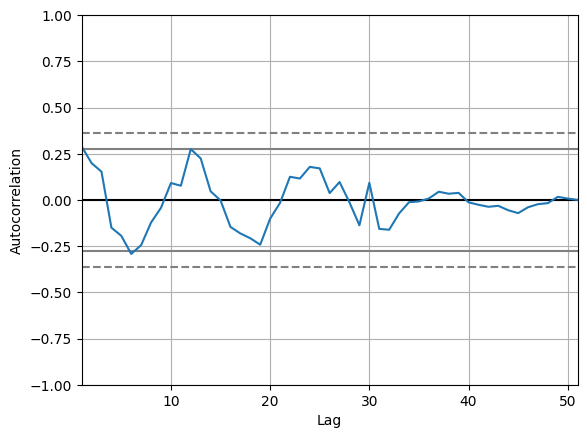

In [ ]:
pd.plotting.autocorrelation_plot(df_Ranchi_dropped['2016':'2020']['Retail Prices'].resample('1m').max())

<Axes: xlabel='y(t)', ylabel='y(t + 4)'>

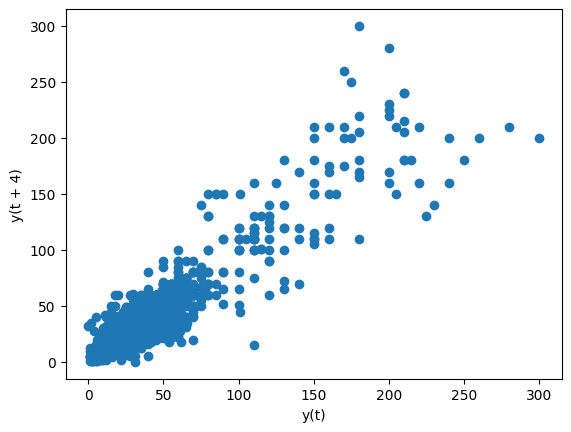

In [ ]:
pd.plotting.lag_plot(df_Ranchi_1['Arrival Quantity'],lag=4)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

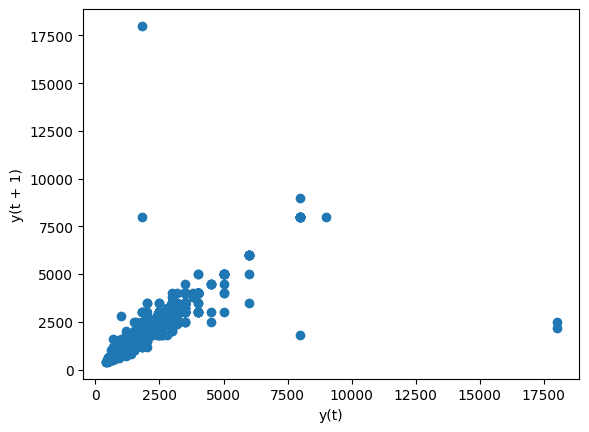

In [ ]:
pd.plotting.lag_plot(df_Ranchi['Retail Prices'],lag=1)

In [ ]:
from statsmodels.tsa.stattools import adfuller


# In[19]:


test_result=adfuller(df_Ranchi_dropped['Arrival Quantity'])


# In[20]:


#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
adfuller_test(df_Ranchi_dropped['Arrival Quantity'])

ADF Test Statistic : -4.493579348334501
p-value : 0.0002019601054302074
#Lags Used : 4
Number of Observations Used : 2920
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
adfuller_test(df_Ranchi_dropped['Retail Prices'])

ADF Test Statistic : -6.34920690147482
p-value : 2.636345497638967e-08
#Lags Used : 1
Number of Observations Used : 2923
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
df_Ranchi.isnull().sum()

Arrival Quantity    882
Retail Prices       882
Min Price           882
Max Price           882
Modal Price         882
dtype: int64

In [ ]:
df_Ranchi.fillna(-1,inplace=True)

In [ ]:
df_Ranchi=df_Ranchi[df_Ranchi['Retail Prices']<10000]

In [ ]:
df_Ranchi.replace(-1,np.nan,inplace=True)

In [ ]:
df_Ranchi_imp=pd.DataFrame()
df_Ranchi_imp['Retail Prices']=df_Ranchi['Retail Prices'].rolling(window=1,min_periods=0).mean().fillna(method='ffill')
df_Ranchi_imp['Arrival Quantity']=df_Ranchi['Arrival Quantity'].rolling(window=4,min_periods=2).mean().fillna(method='ffill')
df_Ranchi_imp['Retail Prices_lag']=df_Ranchi['Retail Prices'].rolling(window=1,min_periods=0).mean().fillna(method='ffill').shift(1)
# df_Ranchi_imp['Arrival Quantity']=df_Ranchi['Arrival Quantity'].rolling(window=5,min_periods=2).mean().fillna(method='bfill')
df_Ranchi_imp=df_Ranchi_imp.dropna()
#df_Ranchi_imp['2008':'2016']['Retail Prices'].plot()
df_Ranchi_imp[['Retail Prices','Retail Prices_lag']].iplot()
df_Ranchi_imp.isnull().sum()

Retail Prices        0
Arrival Quantity     0
Retail Prices_lag    0
dtype: int64

In [ ]:
df_Ranchi_imp_month=pd.DataFrame()
df_Ranchi_imp_month['Retail Prices_lag']=df_Ranchi_imp['Retail Prices_lag'].resample('M').mean()
df_Ranchi_imp_month['Arrival Quantity']=df_Ranchi_imp['Arrival Quantity'].resample('M').max()
df_Ranchi_imp_month['Arrival Quantity_mean']=df_Ranchi_imp['Arrival Quantity'].resample('M').mean()
df_Ranchi_imp_month=df_Ranchi_imp_month.dropna()
df_Ranchi_imp_month.index = df_Ranchi_imp_month.index + pd.offsets.MonthBegin(0)
df_Ranchi_imp_month[['Arrival Quantity','Retail Prices_lag']].tail(6)

Arrival Quantity  Retail Prices_lag
Date                                           
2019-11-01         35.500000        3967.741935
2019-12-01         59.000000        2887.096774
2020-01-01         62.000000        1970.967742
2020-02-01         59.333333        2151.612903
2020-03-01         52.000000        1751.612903
2020-04-01         50.333333        1654.838710

In [ ]:
df_1_new=pd.read_csv('Fert_dies_price.csv',index_col=[0],parse_dates=True)
df_1_new

N       P       K      S  thousand million barrels  \
2010-01-01  23.227  26.276  24.487  1.784                  5.800000   
2010-04-01  23.227  26.276  24.487  1.784                  5.766667   
2010-10-01  23.227  25.950  24.237  1.784                  5.733333   
2011-01-01  23.227  25.624  23.987  1.784                  5.700000   
2011-04-01  27.153  32.338  26.756  1.677                  5.700000   
...            ...     ...     ...    ...                       ...   
2022-03-01  18.901  15.216  11.124  3.562                  4.700000   
2022-04-01  18.901  15.216  11.124  3.562                  4.700000   
2022-05-01  18.901  15.216  11.124  3.562                  4.700000   
2022-06-01  18.901  15.216  11.124  3.562                  4.700000   
2023-06-01  18.901  15.216  11.124  3.562                  4.700000   

                dprice  
2010-01-01   36.493899  
2010-04-01   36.493899  
2010-10-01   36.493899  
2011-01-01   38.805893  
2011-04-01   41.117887  
...                ...  
2022-03-01   90.914634  
2022-04-01  102.012197  
2022-05-01  102.225611  
2022-06-01   94.009148  
2023-06-01   94.756098  

[73 rows x 6 columns]

In [ ]:
#df_1_new=pd.read_csv('FERTILIZERS.csv',names=['Date','N','P','K','S'],header=0,index_col=[0],parse_dates=True)
finaldf1=df_Ranchi_imp_month[['Arrival Quantity_mean','Retail Prices_lag']].copy()
finaldf1

Arrival Quantity_mean  Retail Prices_lag
Date                                                
2010-02-01              29.261111         796.666667
2010-03-01              27.405556         516.666667
2010-04-01              24.467742         912.903226
2010-05-01              22.201613         854.838710
2010-06-01              19.478495        1012.903226
...                           ...                ...
2019-12-01              49.508065        2887.096774
2020-01-01              54.040323        1970.967742
2020-02-01              47.110215        2151.612903
2020-03-01              45.776882        1751.612903
2020-04-01              40.588710        1654.838710

[123 rows x 2 columns]

In [ ]:
finaldf1=df_Ranchi_imp_month[['Arrival Quantity_mean','Retail Prices_lag']].copy()
df_concat_1 = pd.concat([finaldf1, df_1_new], axis=1, join='outer')
df_concat_1.loc[:,['N','P','K','S','thousand million barrels','dprice']]=df_concat_1.loc[:,['N','P','K','S','thousand million barrels','dprice']].interpolate().fillna(method='bfill')
df_concat_1.dropna(subset=['Arrival Quantity_mean','Retail Prices_lag'],inplace=True)
df_concat_1.head()

Arrival Quantity_mean  Retail Prices_lag       N          P  \
2010-02-01              29.261111         796.666667  23.227  26.276000   
2010-03-01              27.405556         516.666667  23.227  26.276000   
2010-04-01              24.467742         912.903226  23.227  26.276000   
2010-05-01              22.201613         854.838710  23.227  26.221667   
2010-06-01              19.478495        1012.903226  23.227  26.167333   

                    K      S  thousand million barrels     dprice  
2010-02-01  24.487000  1.784                  5.788889  36.493899  
2010-03-01  24.487000  1.784                  5.777778  36.493899  
2010-04-01  24.487000  1.784                  5.766667  36.493899  
2010-05-01  24.445333  1.784                  5.761111  36.493899  
2010-06-01  24.403667  1.784                  5.755556  36.493899

In [ ]:
df_concat_1['NBS rate']=3*df_concat_1['N']+1.5*df_concat_1['P']+df_concat_1['K']
df_concat_1=df_concat_1.loc[:,['Arrival Quantity_mean','Retail Prices_lag','NBS rate','thousand million barrels','dprice']]
df_concat_1

Arrival Quantity_mean  Retail Prices_lag    NBS rate  \
2010-02-01              29.261111         796.666667  133.582000   
2010-03-01              27.405556         516.666667  133.582000   
2010-04-01              24.467742         912.903226  133.582000   
2010-05-01              22.201613         854.838710  133.458833   
2010-06-01              19.478495        1012.903226  133.335667   
...                           ...                ...         ...   
2019-12-01              49.508065        2887.096774   90.651000   
2020-01-01              54.040323        1970.967742   90.651000   
2020-02-01              47.110215        2151.612903   90.651000   
2020-03-01              45.776882        1751.612903   90.651000   
2020-04-01              40.588710        1654.838710   90.651000   

            thousand million barrels     dprice  
2010-02-01                  5.788889  36.493899  
2010-03-01                  5.777778  36.493899  
2010-04-01                  5.766667  36.493899  
2010-05-01                  5.761111  36.493899  
2010-06-01                  5.755556  36.493899  
...                              ...        ...  
2019-12-01                  4.700000  66.798783  
2020-01-01                  4.700000  68.826220  
2020-02-01                  4.700000  70.853658  
2020-03-01                  4.700000  67.225611  
2020-04-01                  4.700000  63.597564  

[123 rows x 5 columns]

In [ ]:
df_rain=pd.read_csv('Rainfall.csv',index_col=[0],parse_dates=True)
df_rain_m=df_rain.resample('MS').sum()
df_rain_m=df_rain_m.loc[df_concat_1.index,:]
df_rain_m

Rainfall
2010-02-01      14.8
2010-03-01       0.0
2010-04-01      15.4
2010-05-01      30.1
2010-06-01      66.6
...              ...
2019-12-01      16.5
2020-01-01      21.7
2020-02-01       3.8
2020-03-01      73.0
2020-04-01      43.8

[123 rows x 1 columns]

In [ ]:
df_concat_1=pd.concat([df_concat_1,df_rain_m],axis=1)
df_concat_1

Arrival Quantity_mean  Retail Prices_lag    NBS rate  \
2010-02-01              29.261111         796.666667  133.582000   
2010-03-01              27.405556         516.666667  133.582000   
2010-04-01              24.467742         912.903226  133.582000   
2010-05-01              22.201613         854.838710  133.458833   
2010-06-01              19.478495        1012.903226  133.335667   
...                           ...                ...         ...   
2019-12-01              49.508065        2887.096774   90.651000   
2020-01-01              54.040323        1970.967742   90.651000   
2020-02-01              47.110215        2151.612903   90.651000   
2020-03-01              45.776882        1751.612903   90.651000   
2020-04-01              40.588710        1654.838710   90.651000   

            thousand million barrels     dprice  Rainfall  
2010-02-01                  5.788889  36.493899      14.8  
2010-03-01                  5.777778  36.493899       0.0  
2010-04-01                  5.766667  36.493899      15.4  
2010-05-01                  5.761111  36.493899      30.1  
2010-06-01                  5.755556  36.493899      66.6  
...                              ...        ...       ...  
2019-12-01                  4.700000  66.798783      16.5  
2020-01-01                  4.700000  68.826220      21.7  
2020-02-01                  4.700000  70.853658       3.8  
2020-03-01                  4.700000  67.225611      73.0  
2020-04-01                  4.700000  63.597564      43.8  

[123 rows x 6 columns]

In [ ]:
df_new=pd.read_csv('gdp and cpi merged.csv',index_col=0,parse_dates=True)
finaldf1=df_concat_1.merge(df_new,on=df_concat_1.index)
finaldf1=finaldf1.iloc[:-2,:]



In [ ]:
finaldf1

key_0  Arrival Quantity_mean  Retail Prices_lag    NBS rate  \
0   2010-02-01              29.261111         796.666667  133.582000   
1   2010-03-01              27.405556         516.666667  133.582000   
2   2010-04-01              24.467742         912.903226  133.582000   
3   2010-05-01              22.201613         854.838710  133.458833   
4   2010-06-01              19.478495        1012.903226  133.335667   
..         ...                    ...                ...         ...   
116 2019-10-01              51.018817        2845.161290   90.651000   
117 2019-11-01              23.271505        3967.741935   90.651000   
118 2019-12-01              49.508065        2887.096774   90.651000   
119 2020-01-01              54.040323        1970.967742   90.651000   
120 2020-02-01              47.110215        2151.612903   90.651000   

     thousand million barrels     dprice  Rainfall         CPI        GDP  
0                    5.788889  36.493899      14.8   65.030284   99.41989  
1                    5.777778  36.493899       0.0   65.030284   99.62147  
2                    5.766667  36.493899      15.4   65.030284   99.81792  
3                    5.761111  36.493899      30.1   65.795346  100.00665  
4                    5.755556  36.493899      66.6   66.560408  100.18442  
..                        ...        ...       ...         ...        ...  
116                  4.700000  69.253048      92.6  124.322601  100.27402  
117                  4.700000  68.025915       0.3  125.470194  100.08812  
118                  4.700000  66.798783      16.5  126.235257   99.88208  
119                  4.700000  68.826220      21.7  126.235257   99.65701  
120                  4.700000  70.853658       3.8  125.470194   99.41502  

[121 rows x 9 columns]

In [ ]:
finaldf1['ds'] = pd.to_datetime(finaldf1.key_0)
finaldf1.drop('key_0',axis=1,inplace=True)
finaldf1
finaldf1.rename(columns={'Retail Prices_lag':'y'},inplace=True)
finaldf1.tail()

Arrival Quantity_mean            y  NBS rate  thousand million barrels  \
116              51.018817  2845.161290    90.651                       4.7   
117              23.271505  3967.741935    90.651                       4.7   
118              49.508065  2887.096774    90.651                       4.7   
119              54.040323  1970.967742    90.651                       4.7   
120              47.110215  2151.612903    90.651                       4.7   

        dprice  Rainfall         CPI        GDP         ds  
116  69.253048      92.6  124.322601  100.27402 2019-10-01  
117  68.025915       0.3  125.470194  100.08812 2019-11-01  
118  66.798783      16.5  126.235257   99.88208 2019-12-01  
119  68.826220      21.7  126.235257   99.65701 2020-01-01  
120  70.853658       3.8  125.470194   99.41502 2020-02-01

In [ ]:
df_1_new

N       P       K      S  thousand million barrels  \
2010-01-01  23.227  26.276  24.487  1.784                  5.800000   
2010-04-01  23.227  26.276  24.487  1.784                  5.766667   
2010-10-01  23.227  25.950  24.237  1.784                  5.733333   
2011-01-01  23.227  25.624  23.987  1.784                  5.700000   
2011-04-01  27.153  32.338  26.756  1.677                  5.700000   
...            ...     ...     ...    ...                       ...   
2022-03-01  18.901  15.216  11.124  3.562                  4.700000   
2022-04-01  18.901  15.216  11.124  3.562                  4.700000   
2022-05-01  18.901  15.216  11.124  3.562                  4.700000   
2022-06-01  18.901  15.216  11.124  3.562                  4.700000   
2023-06-01  18.901  15.216  11.124  3.562                  4.700000   

                dprice  
2010-01-01   36.493899  
2010-04-01   36.493899  
2010-10-01   36.493899  
2011-01-01   38.805893  
2011-04-01   41.117887  
...                ...  
2022-03-01   90.914634  
2022-04-01  102.012197  
2022-05-01  102.225611  
2022-06-01   94.009148  
2023-06-01   94.756098  

[73 rows x 6 columns]

In [ ]:
finaldf=df_Ranchi_imp_month[['Arrival Quantity','Retail Prices_lag']].copy()
df_concat = pd.concat([finaldf, df_1_new], axis=1, join='outer')
df_concat.loc[:,['N','P','K','S','thousand million barrels','dprice']]=df_concat.loc[:,['N','P','K','S','thousand million barrels','dprice']].interpolate().fillna(method='bfill')
df_concat.dropna(subset=['Arrival Quantity','Retail Prices_lag'],inplace=True)
df_concat.tail()

Arrival Quantity  Retail Prices_lag       N       P       K  \
2019-12-01         59.000000        2887.096774  18.901  15.216  11.124   
2020-01-01         62.000000        1970.967742  18.901  15.216  11.124   
2020-02-01         59.333333        2151.612903  18.901  15.216  11.124   
2020-03-01         52.000000        1751.612903  18.901  15.216  11.124   
2020-04-01         50.333333        1654.838710  18.901  15.216  11.124   

                S  thousand million barrels     dprice  
2019-12-01  3.562                       4.7  66.798783  
2020-01-01  3.562                       4.7  68.826220  
2020-02-01  3.562                       4.7  70.853658  
2020-03-01  3.562                       4.7  67.225611  
2020-04-01  3.562                       4.7  63.597564

In [ ]:
df_concat['NBS rate']=3*df_concat['N']+1.5*df_concat['P']+df_concat['K']
df_concat=df_concat.loc[:,['Arrival Quantity','Retail Prices_lag','NBS rate','thousand million barrels','dprice']]
df_concat

Arrival Quantity  Retail Prices_lag    NBS rate  \
2010-02-01         35.333333         796.666667  133.582000   
2010-03-01         29.750000         516.666667  133.582000   
2010-04-01         30.500000         912.903226  133.582000   
2010-05-01         26.666667         854.838710  133.458833   
2010-06-01         26.666667        1012.903226  133.335667   
...                      ...                ...         ...   
2019-12-01         59.000000        2887.096774   90.651000   
2020-01-01         62.000000        1970.967742   90.651000   
2020-02-01         59.333333        2151.612903   90.651000   
2020-03-01         52.000000        1751.612903   90.651000   
2020-04-01         50.333333        1654.838710   90.651000   

            thousand million barrels     dprice  
2010-02-01                  5.788889  36.493899  
2010-03-01                  5.777778  36.493899  
2010-04-01                  5.766667  36.493899  
2010-05-01                  5.761111  36.493899  
2010-06-01                  5.755556  36.493899  
...                              ...        ...  
2019-12-01                  4.700000  66.798783  
2020-01-01                  4.700000  68.826220  
2020-02-01                  4.700000  70.853658  
2020-03-01                  4.700000  67.225611  
2020-04-01                  4.700000  63.597564  

[123 rows x 5 columns]

In [ ]:
df_concat=pd.concat([df_concat,df_rain_m],axis=1)
df_concat

Arrival Quantity  Retail Prices_lag    NBS rate  \
2010-02-01         35.333333         796.666667  133.582000   
2010-03-01         29.750000         516.666667  133.582000   
2010-04-01         30.500000         912.903226  133.582000   
2010-05-01         26.666667         854.838710  133.458833   
2010-06-01         26.666667        1012.903226  133.335667   
...                      ...                ...         ...   
2019-12-01         59.000000        2887.096774   90.651000   
2020-01-01         62.000000        1970.967742   90.651000   
2020-02-01         59.333333        2151.612903   90.651000   
2020-03-01         52.000000        1751.612903   90.651000   
2020-04-01         50.333333        1654.838710   90.651000   

            thousand million barrels     dprice  Rainfall  
2010-02-01                  5.788889  36.493899      14.8  
2010-03-01                  5.777778  36.493899       0.0  
2010-04-01                  5.766667  36.493899      15.4  
2010-05-01                  5.761111  36.493899      30.1  
2010-06-01                  5.755556  36.493899      66.6  
...                              ...        ...       ...  
2019-12-01                  4.700000  66.798783      16.5  
2020-01-01                  4.700000  68.826220      21.7  
2020-02-01                  4.700000  70.853658       3.8  
2020-03-01                  4.700000  67.225611      73.0  
2020-04-01                  4.700000  63.597564      43.8  

[123 rows x 6 columns]

In [ ]:
df_new=pd.read_csv('gdp and cpi merged.csv',index_col=0,parse_dates=True)
finaldf=df_concat.merge(df_new,on=df_concat.index)
finaldf=finaldf.iloc[:-2,:]
finaldf

key_0  Arrival Quantity  Retail Prices_lag    NBS rate  \
0   2010-02-01         35.333333         796.666667  133.582000   
1   2010-03-01         29.750000         516.666667  133.582000   
2   2010-04-01         30.500000         912.903226  133.582000   
3   2010-05-01         26.666667         854.838710  133.458833   
4   2010-06-01         26.666667        1012.903226  133.335667   
..         ...               ...                ...         ...   
116 2019-10-01         58.333333        2845.161290   90.651000   
117 2019-11-01         35.500000        3967.741935   90.651000   
118 2019-12-01         59.000000        2887.096774   90.651000   
119 2020-01-01         62.000000        1970.967742   90.651000   
120 2020-02-01         59.333333        2151.612903   90.651000   

     thousand million barrels     dprice  Rainfall         CPI        GDP  
0                    5.788889  36.493899      14.8   65.030284   99.41989  
1                    5.777778  36.493899       0.0   65.030284   99.62147  
2                    5.766667  36.493899      15.4   65.030284   99.81792  
3                    5.761111  36.493899      30.1   65.795346  100.00665  
4                    5.755556  36.493899      66.6   66.560408  100.18442  
..                        ...        ...       ...         ...        ...  
116                  4.700000  69.253048      92.6  124.322601  100.27402  
117                  4.700000  68.025915       0.3  125.470194  100.08812  
118                  4.700000  66.798783      16.5  126.235257   99.88208  
119                  4.700000  68.826220      21.7  126.235257   99.65701  
120                  4.700000  70.853658       3.8  125.470194   99.41502  

[121 rows x 9 columns]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

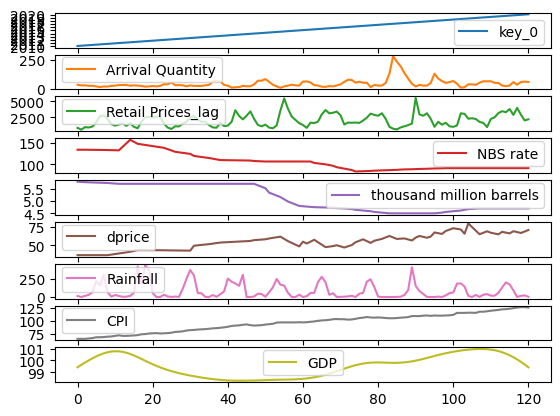

In [ ]:
finaldf.plot(subplots=True)

In [ ]:
finaldf['ds'] = finaldf['key_0']
finaldf.drop('key_0',axis=1,inplace=True)
finaldf
finaldf.rename(columns={'Retail Prices_lag':'y'},inplace=True)
finaldf.tail()

Arrival Quantity            y  NBS rate  thousand million barrels  \
116         58.333333  2845.161290    90.651                       4.7   
117         35.500000  3967.741935    90.651                       4.7   
118         59.000000  2887.096774    90.651                       4.7   
119         62.000000  1970.967742    90.651                       4.7   
120         59.333333  2151.612903    90.651                       4.7   

        dprice  Rainfall         CPI        GDP         ds  
116  69.253048      92.6  124.322601  100.27402 2019-10-01  
117  68.025915       0.3  125.470194  100.08812 2019-11-01  
118  66.798783      16.5  126.235257   99.88208 2019-12-01  
119  68.826220      21.7  126.235257   99.65701 2020-01-01  
120  70.853658       3.8  125.470194   99.41502 2020-02-01

In [ ]:
finaldf['ds']

0     2010-02-01
1     2010-03-01
2     2010-04-01
3     2010-05-01
4     2010-06-01
         ...    
116   2019-10-01
117   2019-11-01
118   2019-12-01
119   2020-01-01
120   2020-02-01
Name: ds, Length: 121, dtype: datetime64[ns]

In [ ]:
finaldf.isnull().sum()

Arrival Quantity            0
y                           0
NBS rate                    0
thousand million barrels    0
dprice                      0
Rainfall                    0
CPI                         0
GDP                         0
ds                          0
dtype: int64

In [ ]:
finaldf1.corr()

<ipython-input-63-29b5b127a9ac>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Arrival Quantity_mean         y  NBS rate  \
Arrival Quantity_mean                  1.000000 -0.444293 -0.362711   
y                                     -0.444293  1.000000 -0.254349   
NBS rate                              -0.362711 -0.254349  1.000000   
thousand million barrels              -0.378899 -0.246173  0.875941   
dprice                                 0.267034  0.217795 -0.802356   
Rainfall                              -0.352288  0.232306  0.170485   
CPI                                    0.281906  0.340278 -0.910475   
GDP                                    0.127513  0.010560 -0.093975   

                          thousand million barrels    dprice  Rainfall  \
Arrival Quantity_mean                    -0.378899  0.267034 -0.352288   
y                                        -0.246173  0.217795  0.232306   
NBS rate                                  0.875941 -0.802356  0.170485   
thousand million barrels                  1.000000 -0.713936  0.165440   
dprice                                   -0.713936  1.000000 -0.123350   
Rainfall                                  0.165440 -0.123350  1.000000   
CPI                                      -0.877721  0.904182 -0.126315   
GDP                                      -0.340912  0.216516 -0.062479   

                               CPI       GDP  
Arrival Quantity_mean     0.281906  0.127513  
y                         0.340278  0.010560  
NBS rate                 -0.910475 -0.093975  
thousand million barrels -0.877721 -0.340912  
dprice                    0.904182  0.216516  
Rainfall                 -0.126315 -0.062479  
CPI                       1.000000  0.246885  
GDP                       0.246885  1.000000

In [ ]:
finaldf.corr()

<ipython-input-64-fbcde4b1202f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Arrival Quantity         y  NBS rate  \
Arrival Quantity                  1.000000 -0.420780 -0.365716   
y                                -0.420780  1.000000 -0.254349   
NBS rate                         -0.365716 -0.254349  1.000000   
thousand million barrels         -0.374913 -0.246173  0.875941   
dprice                            0.280739  0.217795 -0.802356   
Rainfall                         -0.324880  0.232306  0.170485   
CPI                               0.279316  0.340278 -0.910475   
GDP                               0.098148  0.010560 -0.093975   

                          thousand million barrels    dprice  Rainfall  \
Arrival Quantity                         -0.374913  0.280739 -0.324880   
y                                        -0.246173  0.217795  0.232306   
NBS rate                                  0.875941 -0.802356  0.170485   
thousand million barrels                  1.000000 -0.713936  0.165440   
dprice                                   -0.713936  1.000000 -0.123350   
Rainfall                                  0.165440 -0.123350  1.000000   
CPI                                      -0.877721  0.904182 -0.126315   
GDP                                      -0.340912  0.216516 -0.062479   

                               CPI       GDP  
Arrival Quantity          0.279316  0.098148  
y                         0.340278  0.010560  
NBS rate                 -0.910475 -0.093975  
thousand million barrels -0.877721 -0.340912  
dprice                    0.904182  0.216516  
Rainfall                 -0.126315 -0.062479  
CPI                       1.000000  0.246885  
GDP                       0.246885  1.000000

In [ ]:
#finaldf=finaldf1

In [ ]:
import numpy as np
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, r2_score,mean_absolute_percentage_error
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation

#from sklearn.linear_model import LinearRegression

import plotly.graph_objs as go
from plotly.subplots import make_subplots


import itertools

In [ ]:
# splitting train and test data
trainDataSize = 0.80
splitSize = int(finaldf.shape[0]*trainDataSize)
print(splitSize)
train = finaldf[0:splitSize]
test = finaldf[splitSize:]
print(train.shape)
print(test.shape)

prophetColumns =['Arrival Quantity','CPI','GDP','NBS rate','thousand million barrels']
# model

model = Prophet()

# adding all columns in add regressor
for col in prophetColumns:
    model.add_regressor(col)
#training model
model.fit(train)

future =test.copy()
future.drop('y',axis=1,inplace=True)

#prediction
prediction = model.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph6xqauzl/sttz865_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph6xqauzl/z6rz9wwe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1896', 'data', 'file=/tmp/tmph6xqauzl/sttz865_.json', 'init=/tmp/tmph6xqauzl/z6rz9wwe.json', 'output', 'file=/tmp/tmph6xqauzl/prophet_modelbtaeft1p/prophet_model-20230713143227.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:32:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


96
(96, 9)
(25, 9)


14:32:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 518.383
MAPE: 0.2656787882259438


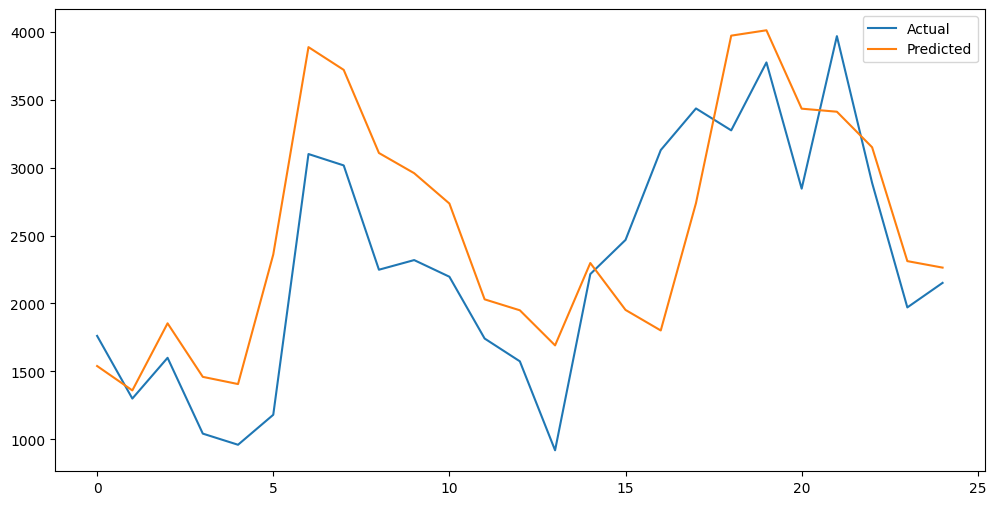

In [ ]:
y_true = test['y'].values
y_pred = prediction['yhat'].values


plt.figure(figsize=(12, 6))
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
mape = mean_absolute_percentage_error(y_true, y_pred)
print("MAPE:", mape)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=test['ds'].values, y=y_true, name="actual targets"),)
    #secondary_y=False,)
fig.add_trace(
    go.Scatter(x=test['ds'].values, y=y_pred, name="predicted targets"),)
    #secondary_y=True,)
fig.add_trace(go.Scatter(x=finaldf['ds'].values, y=finaldf['y'].values, name="original data"),)
    #secondary_y=True,)
fig.update_layout(
    title_text="Actual vs Predicted Targets")
fig.update_xaxes(title_text="Timeline")
fig.update_yaxes(title_text="actual targets", secondary_y=False)
fig.update_yaxes(title_text="predicted targets", secondary_y=True)
fig.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph6xqauzl/6_ruqvyc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph6xqauzl/s0qeouxe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46668', 'data', 'file=/tmp/tmph6xqauzl/6_ruqvyc.json', 'init=/tmp/tmph6xqauzl/s0qeouxe.json', 'output', 'file=/tmp/tmph6xqauzl/prophet_modell6rut_5w/prophet_model-20230713143229.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:32:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


96
(96, 9)
(25, 9)


14:32:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 529.459
MAPE: 0.270405413474738


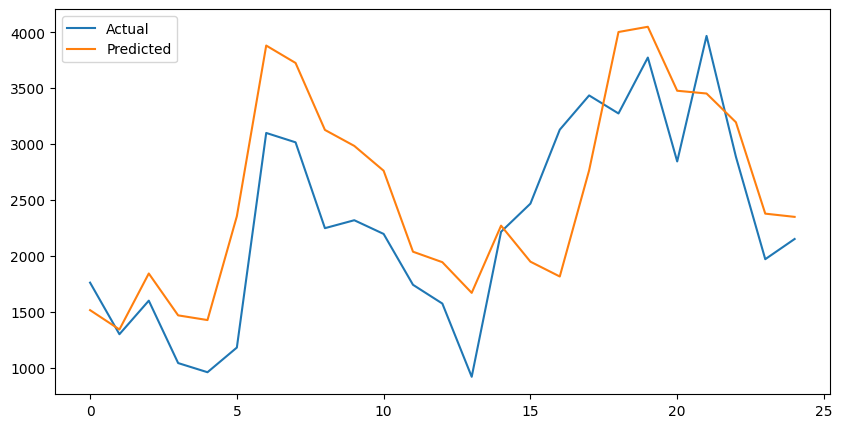

In [ ]:
#Trial 2

# splitting train and test data
trainDataSize = 0.80
splitSize = int(finaldf.shape[0]*trainDataSize)
print(splitSize)
train = finaldf[0:splitSize]
test = finaldf[splitSize:]
print(train.shape)
print(test.shape)
prophetColumns =['Arrival Quantity','CPI','GDP','NBS rate']
# model

#seasonality_mode = 'multiplicative'

#modelWeekly = Prophet(changepoint_range=0.90,changepoint_prior_scale = 0.5)

model = Prophet(changepoint_range=0.95,changepoint_prior_scale = 1,)#seasonality_prior_scale=20)

# adding all columns in add regressor
for col in prophetColumns:
    model.add_regressor(col)
#training model
model.fit(train)

future =test.copy()
future.drop('y',axis=1,inplace=True)

#prediction
prediction = model.predict(future)

y_true = test['y'].values
y_pred = prediction['yhat'].values


plt.figure(figsize=(10, 5))
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
mape = mean_absolute_percentage_error(y_true, y_pred)
print("MAPE:", mape)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
# with extreme weather and 80% train data, seasonality mode mulitplicative
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=test['ds'].values, y=y_true, name="actual targets"),)
    #secondary_y=False,)
fig.add_trace(
    go.Scatter(x=test['ds'].values, y=y_pred, name="predicted targets"),)
    #secondary_y=True,)
fig.add_trace(go.Scatter(x=finaldf['ds'].values, y=finaldf['y'].values, name="original data"),)
    #secondary_y=True,)
fig.update_layout(
    title_text="Actual vs Predicted Targets")
fig.update_xaxes(title_text="Timeline")
fig.update_yaxes(title_text="actual targets", secondary_y=False)
fig.update_yaxes(title_text="predicted targets", secondary_y=True)
fig.show()

In [ ]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 120
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Arrival Quantity          121 non-null    float64       
 1   y                         121 non-null    float64       
 2   NBS rate                  121 non-null    float64       
 3   thousand million barrels  121 non-null    float64       
 4   dprice                    121 non-null    float64       
 5   Rainfall                  121 non-null    float64       
 6   CPI                       121 non-null    float64       
 7   GDP                       121 non-null    float64       
 8   ds                        121 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(8)
memory usage: 9.5 KB


In [ ]:
def model_prophet(Prophetdf,n_obs= 115):

    Prophetdf_train=Prophetdf[0:n_obs]
    Prophetdf_test =Prophetdf[n_obs:]
    multi_model = Prophet(interval_width = 0.95)
    Prophet_cols = Prophetdf.columns.tolist()
    Prophet_cols.remove('ds')
    Prophet_cols.remove('y')
    print(Prophetdf_train.columns)
    #print(Prophetdf_test[['ds','y']])

    # adding all columns in add regressor
    for col in Prophet_cols:
        multi_model.add_regressor(col)


    multi_model.fit(Prophetdf_train)
    print('Prophetdf_test.shape[0]')
    print(Prophetdf_test.shape[0])
    # make furture frame
    future = multi_model.make_future_dataframe(periods = Prophetdf_test.shape[0],freq='MS', include_history=True)
    for col in Prophet_cols:
        future[col] =Prophetdf[col]
    print(Prophetdf_test[['ds','y']])
    print('future')
    print(future)

    # predict future
    forecastProphet =  multi_model.predict(future)
    combined_df = pd.merge(Prophetdf_test[['ds','y']],forecastProphet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

    print(forecastProphet[['ds','yhat', 'yhat_lower','yhat_upper']].tail())

    fig1 = multi_model.plot(forecastProphet)

    Prophetdf.plot(x = 'ds', y = 'y')

    multi_model.plot_components(forecastProphet);


    #print(Prophetdf_test[['ds','y']])
    print(forecastProphet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-6:])

    combined_df = pd.merge(Prophetdf_test[['ds','y']],forecastProphet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-6:], on='ds')
    #print(combined_df.head())


    #Check MAE value
    MAE = mean_absolute_error(combined_df['y'], combined_df['yhat'])
    print('MAE')
    print(MAE)

#Check MAPE value
    MAPE = mean_absolute_percentage_error(combined_df['y'], combined_df['yhat'])
    print('MAPE')
    print(MAPE)

    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.rcParams.update({'figure.figsize':  (15, 3),  'figure.dpi' : 300})
    fig, ax = plt.subplots()

    sns.lineplot(data = Prophetdf , x = 'ds', y = 'y' ,label = 'Original')
    sns.lineplot(data= forecastProphet, x = 'ds', y = 'yhat', label = 'Forecast')
    plt.grid(linestyle = '-', linewidth = 0.3)

    plt.legend(["Original","forecast"])


    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.rcParams.update({'figure.figsize':  (15, 3),  'figure.dpi' : 300})
    fig, ax = plt.subplots()
    sns.lineplot(data = Prophetdf[-6:] , x = 'ds', y = 'y' ,label = 'Original')
    sns.lineplot(data= forecastProphet[-6:], x = 'ds', y = 'yhat', label = 'Forecast')
    plt.grid(linestyle = '-', linewidth = 0.3)
    plt.legend(["Original","forecast"])




    return MAE

In [ ]:
finaldf.head()

Arrival Quantity            y    NBS rate  thousand million barrels  \
0         35.333333   796.666667  133.582000                  5.788889   
1         29.750000   516.666667  133.582000                  5.777778   
2         30.500000   912.903226  133.582000                  5.766667   
3         26.666667   854.838710  133.458833                  5.761111   
4         26.666667  1012.903226  133.335667                  5.755556   

      dprice  Rainfall        CPI        GDP         ds  
0  36.493899      14.8  65.030284   99.41989 2010-02-01  
1  36.493899       0.0  65.030284   99.62147 2010-03-01  
2  36.493899      15.4  65.030284   99.81792 2010-04-01  
3  36.493899      30.1  65.795346  100.00665 2010-05-01  
4  36.493899      66.6  66.560408  100.18442 2010-06-01

In [ ]:
finaldf1.head()

Arrival Quantity_mean            y    NBS rate  thousand million barrels  \
0              29.261111   796.666667  133.582000                  5.788889   
1              27.405556   516.666667  133.582000                  5.777778   
2              24.467742   912.903226  133.582000                  5.766667   
3              22.201613   854.838710  133.458833                  5.761111   
4              19.478495  1012.903226  133.335667                  5.755556   

      dprice  Rainfall        CPI        GDP         ds  
0  36.493899      14.8  65.030284   99.41989 2010-02-01  
1  36.493899       0.0  65.030284   99.62147 2010-03-01  
2  36.493899      15.4  65.030284   99.81792 2010-04-01  
3  36.493899      30.1  65.795346  100.00665 2010-05-01  
4  36.493899      66.6  66.560408  100.18442 2010-06-01

In [ ]:
finaldf1.iplot()

In [ ]:
#HERE we can see that MAE for arrival quantity mean(589.63) resampling is significantly less than that calculated using max resampling(608.94)

In [ ]:
finaldf.drop(['thousand million barrels','CPI'],axis=1,inplace=True)
finaldf.columns

Index(['Arrival Quantity', 'y', 'NBS rate', 'dprice', 'Rainfall', 'GDP', 'ds'], dtype='object')

In [ ]:
finaldf1.drop(['thousand million barrels','CPI'],axis=1,inplace=True)
finaldf1.columns

Index(['Arrival Quantity_mean', 'y', 'NBS rate', 'dprice', 'Rainfall', 'GDP',
       'ds'],
      dtype='object')

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph6xqauzl/0gu2g7i7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph6xqauzl/eec5k332.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15672', 'data', 'file=/tmp/tmph6xqauzl/0gu2g7i7.json', 'init=/tmp/tmph6xqauzl/eec5k332.json', 'output', 'file=/tmp/tmph6xqauzl/prophet_modelyv6uzcve/prophet_model-20230713143231.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Index(['Arrival Quantity', 'y', 'NBS rate', 'dprice', 'Rainfall', 'GDP', 'ds'], dtype='object')
Prophetdf_test.shape[0]
6
            ds            y
115 2019-09-01  3774.193548
116 2019-10-01  2845.161290
117 2019-11-01  3967.741935
118 2019-12-01  2887.096774
119 2020-01-01  1970.967742
120 2020-02-01  2151.612903
future
            ds  Arrival Quantity    NBS rate     dprice  Rainfall        GDP
0   2010-02-01         35.333333  133.582000  36.493899      14.8   99.41989
1   2010-03-01         29.750000  133.582000  36.493899       0.0   99.62147
2   2010-04-01         30.500000  133.582000  36.493899      15.4   99.81792
3   2010-05-01         26.666667  133.458833  36.493899      30.1  100.00665
4   2010-06-01         26.666667  133.335667  36.493899      66.6  100.18442
..         ...               ...         ...        ...       ...        ...
116 2019-10-01         58.333333   90.651000  69.253048      92.6  100.27402
117 2019-11-01         35.500000   90.651000  68.025915    

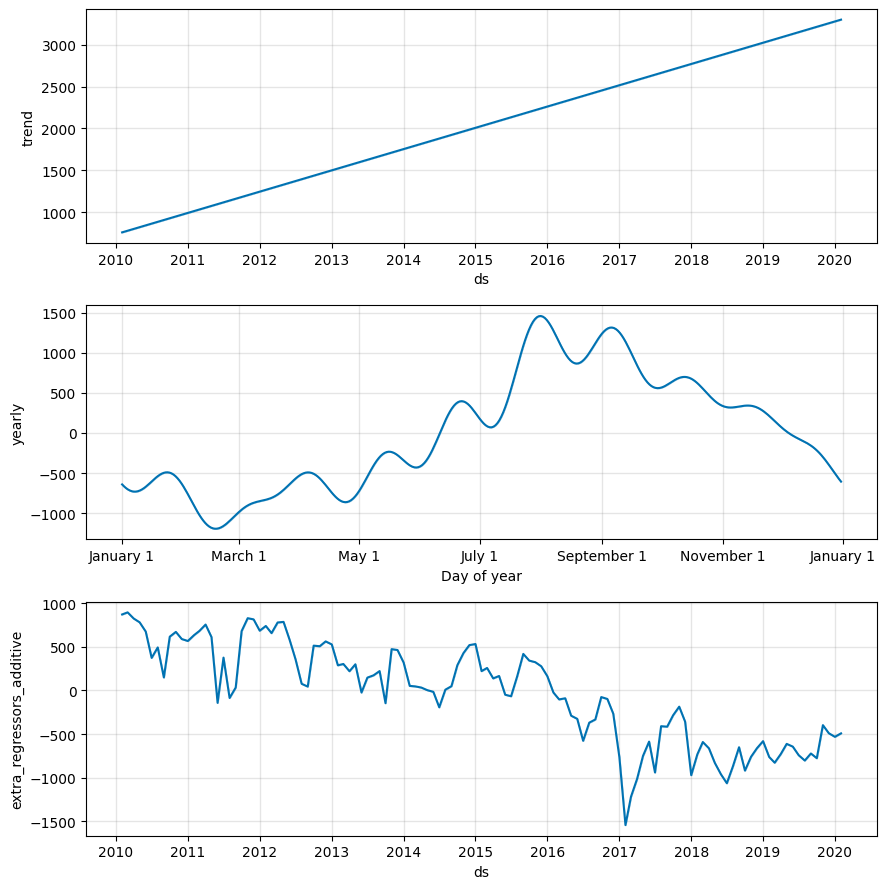

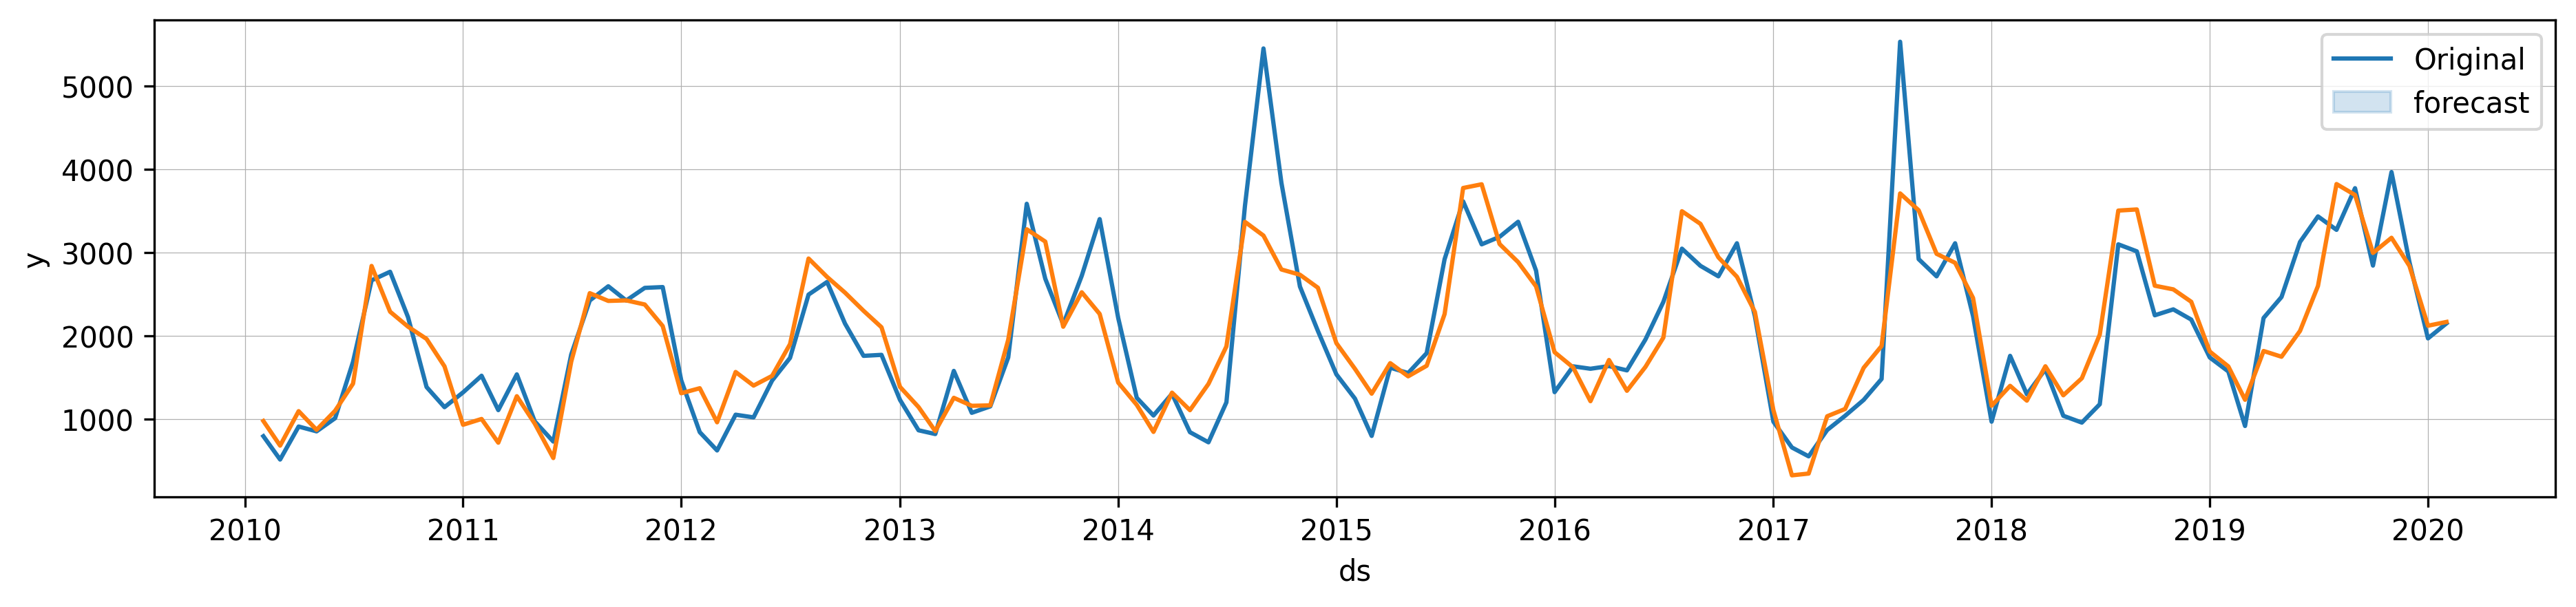

In [ ]:
MAE_Prophet = model_prophet(finaldf)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph6xqauzl/10inogmf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph6xqauzl/44t6dj5y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6821', 'data', 'file=/tmp/tmph6xqauzl/10inogmf.json', 'init=/tmp/tmph6xqauzl/44t6dj5y.json', 'output', 'file=/tmp/tmph6xqauzl/prophet_modelsgyh68yc/prophet_model-20230713143235.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Index(['Arrival Quantity_mean', 'y', 'NBS rate', 'dprice', 'Rainfall', 'GDP',
       'ds'],
      dtype='object')
Prophetdf_test.shape[0]
6
            ds            y
115 2019-09-01  3774.193548
116 2019-10-01  2845.161290
117 2019-11-01  3967.741935
118 2019-12-01  2887.096774
119 2020-01-01  1970.967742
120 2020-02-01  2151.612903
future
            ds  Arrival Quantity_mean    NBS rate     dprice  Rainfall  \
0   2010-02-01              29.261111  133.582000  36.493899      14.8   
1   2010-03-01              27.405556  133.582000  36.493899       0.0   
2   2010-04-01              24.467742  133.582000  36.493899      15.4   
3   2010-05-01              22.201613  133.458833  36.493899      30.1   
4   2010-06-01              19.478495  133.335667  36.493899      66.6   
..         ...                    ...         ...        ...       ...   
116 2019-10-01              51.018817   90.651000  69.253048      92.6   
117 2019-11-01              23.271505   90.651000  68.025915     

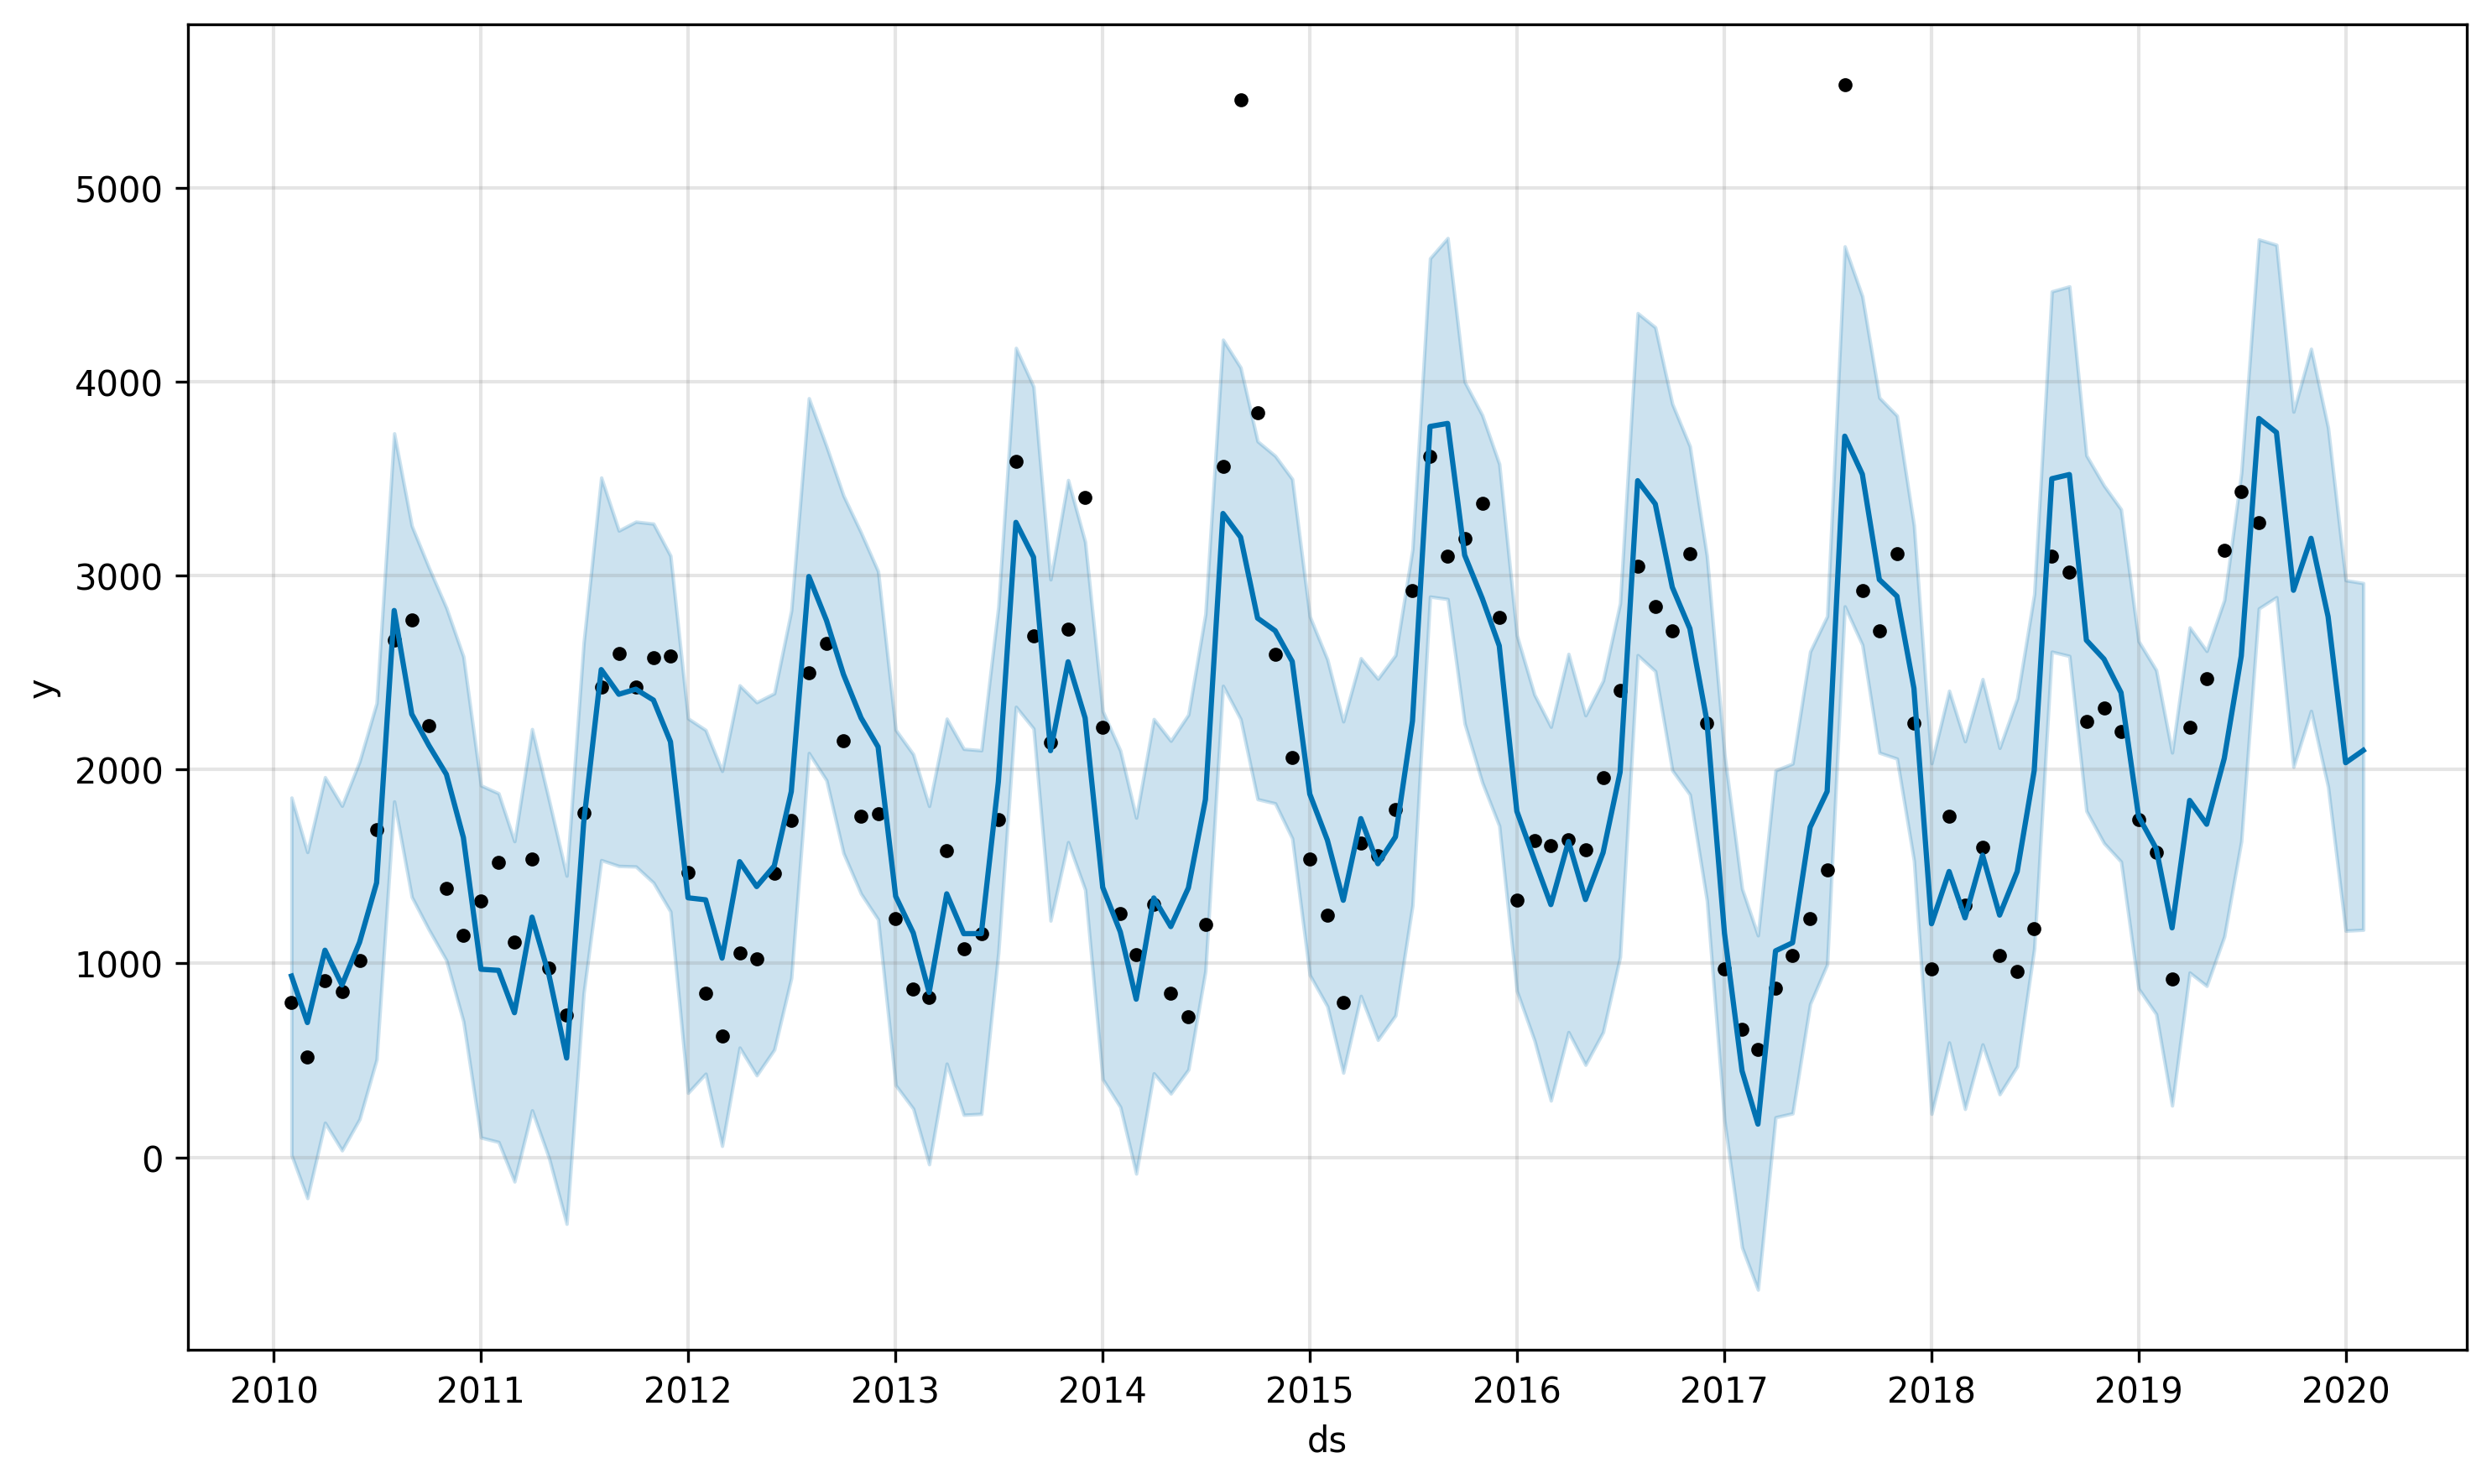

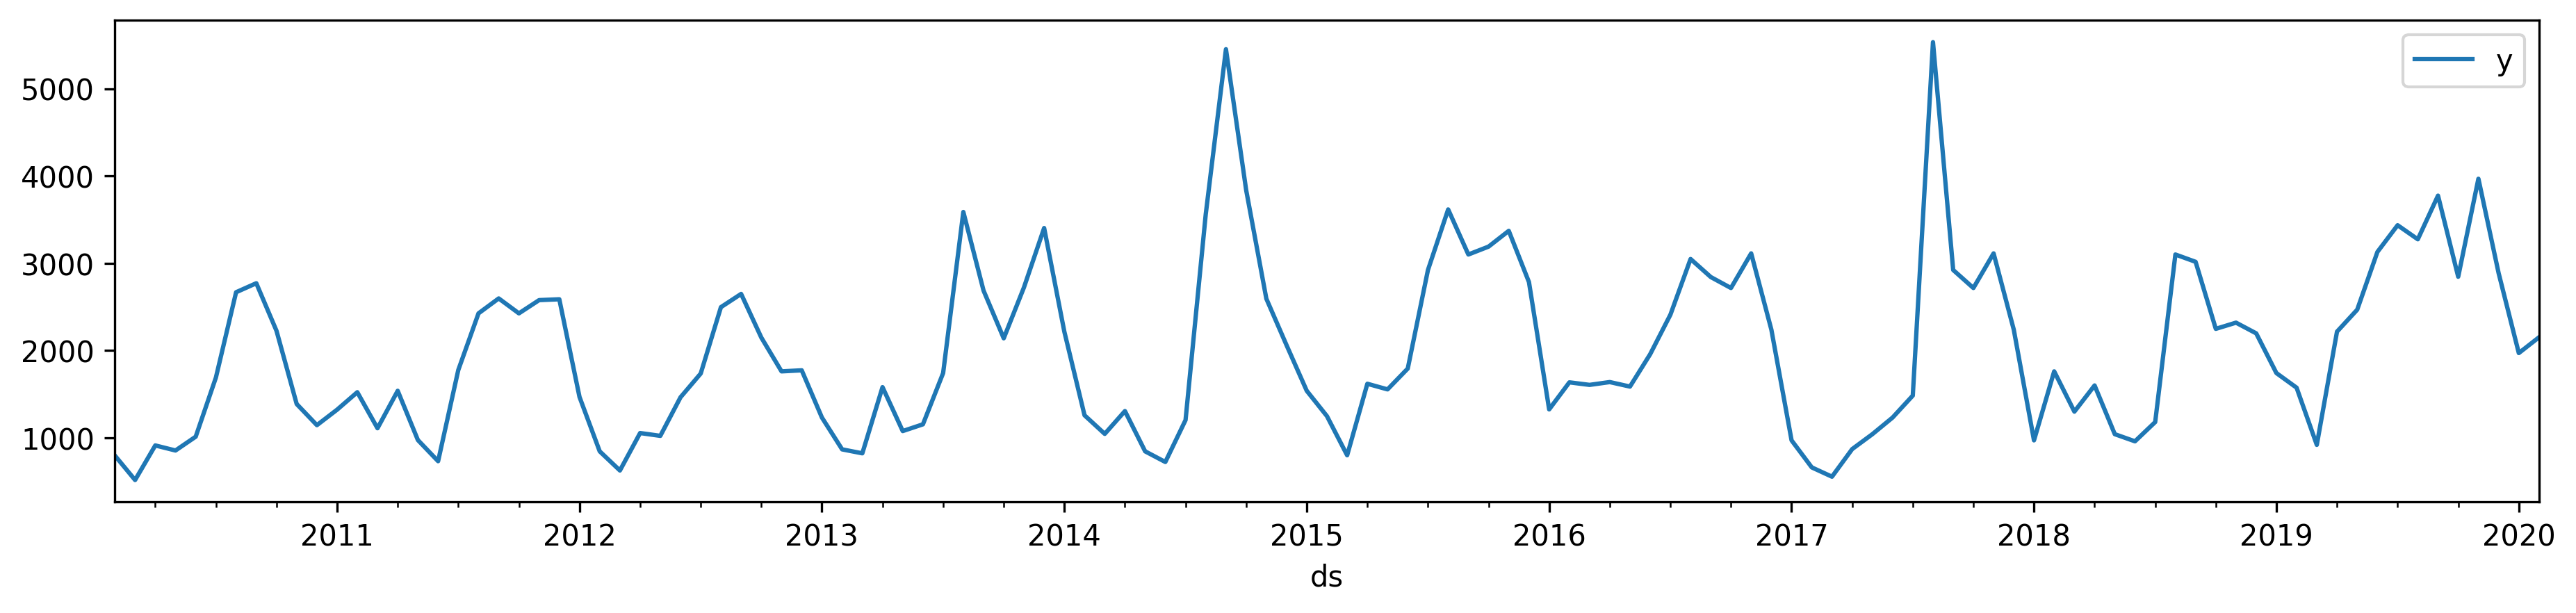

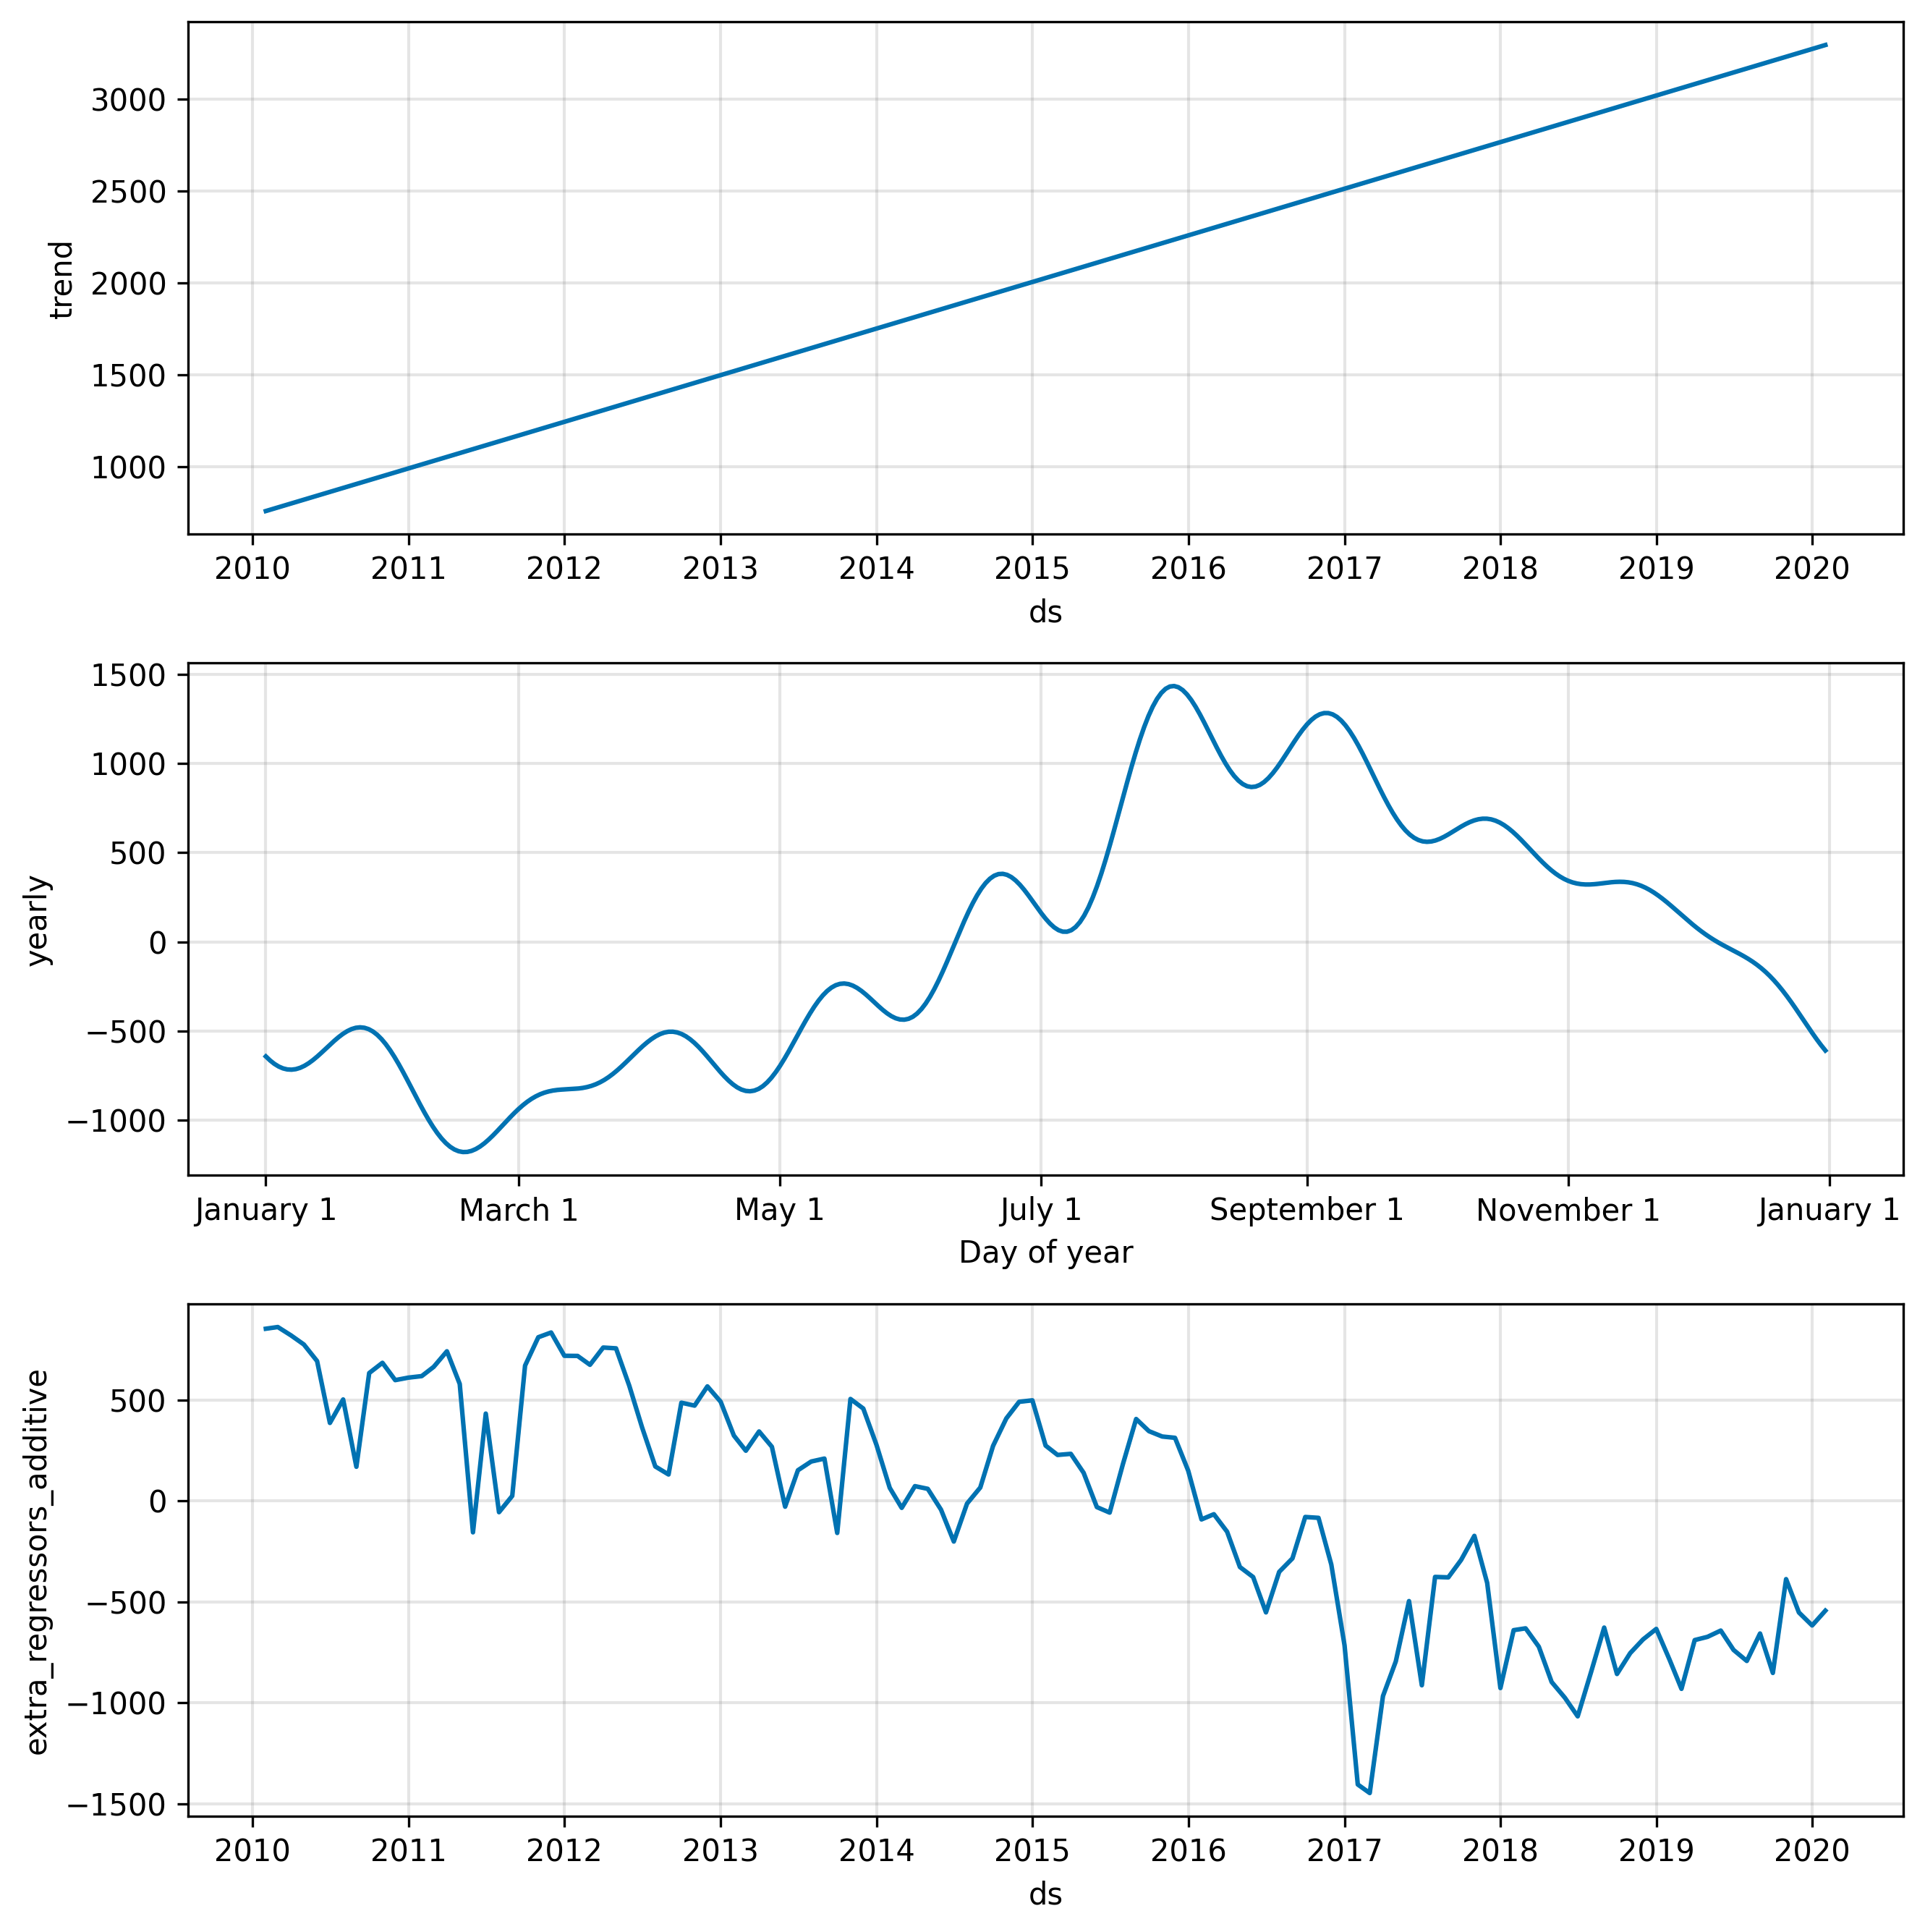

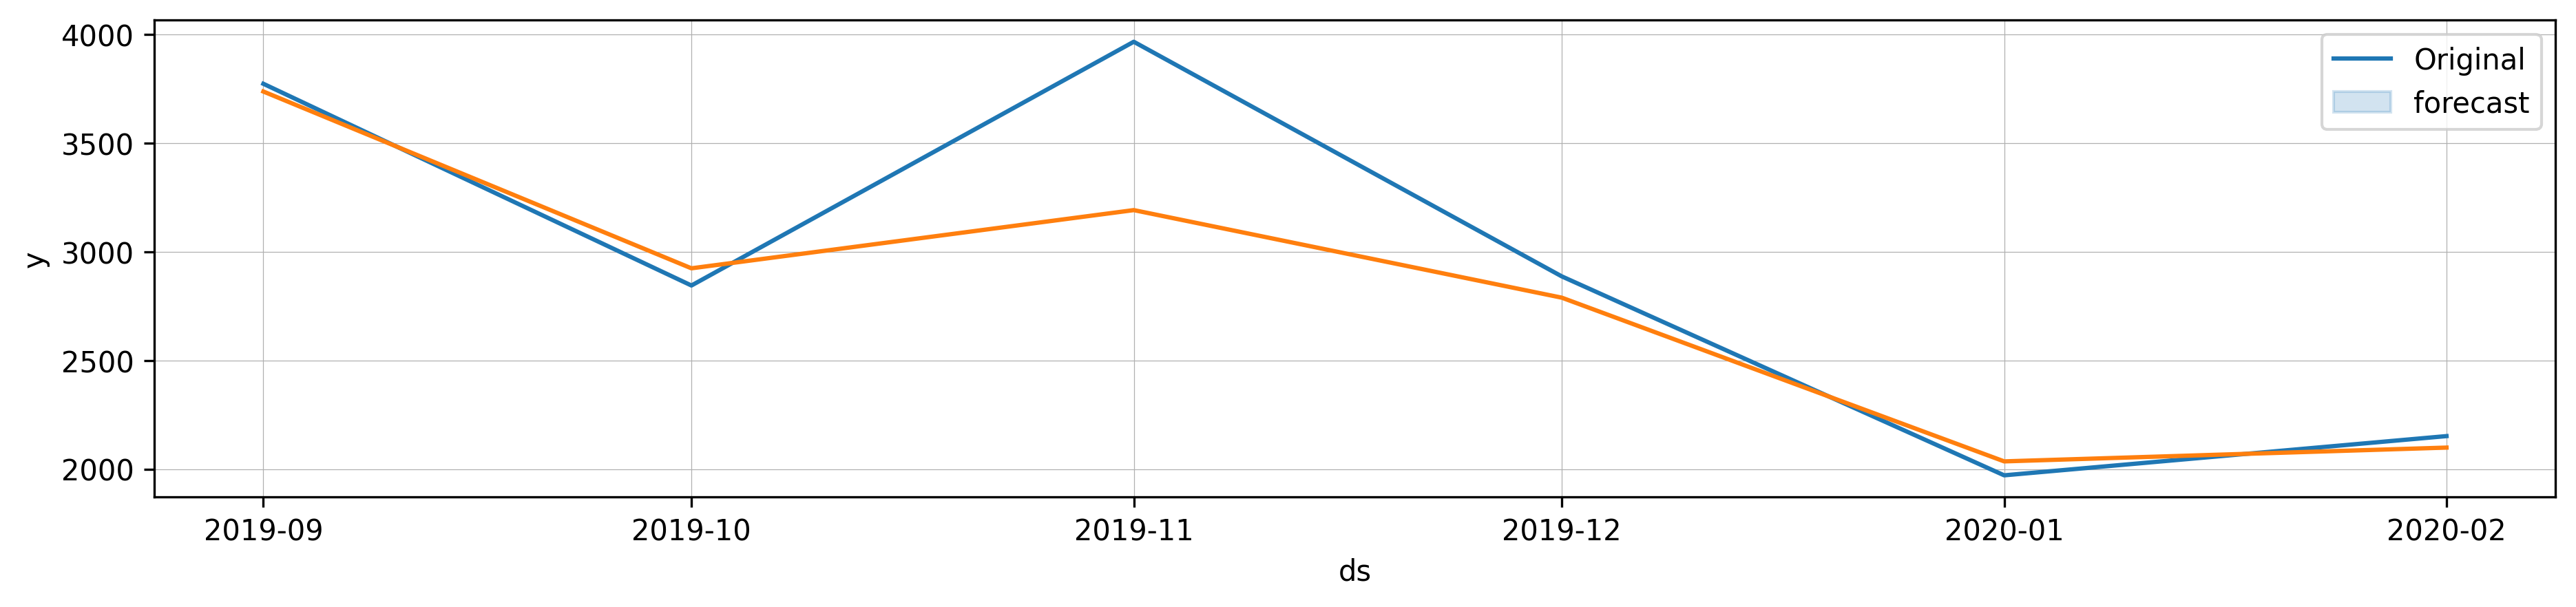

In [ ]:

MAE_Prophet_1=model_prophet(finaldf1)
